# 반도체 공정 데이터 분석

---

## 실습 목표
- 반도체 공정 데이터 분석을 통하여 공정 이상을 예측하는 분류 모델 수행
- 공정 이상에 영향을 미치는 요소들에 대한 데이터 분석
- scikit-learn을 활용한 머신러닝

---

## 데이터 출처
- https://archive.ics.uci.edu/ml/datasets/SECOM

---

## 실습 개요

제조 분야의 디지털 트랜스포메이션이 진행되면서 제조 공정에서 일어나는 수많은 정보가 데이터로 정리되고 있습니다. 제조 공정의 이상을 탐지 분야는 이러한 데이터 바탕으로 구현되는 인공지능 기술로 기존 확률 기반의 예측보다 높은 효율을 내고 있습니다. 이러한 이상 탐지 알고리즘은 불량률을 예측하는 것 뿐만 아니라 어떠한 요소가 불량품을 나오게 하는지 그 원인을 파악하는데 또한 도움을 줄 수 있습니다. 따라서 제조 분야에서의 인공지능을 활용한 이상 탐지는 계속 연구되고 있으며 빠르게 적용되며 그 효율을 보여주고 있습니다.

이번 실습에서는 UCI에서 제공하는 SECOM 공정에서 측정된 센서 데이터를 기반으로 한 데이터를 바탕으로 공정 이상을 예측해보는 분류 모델을 구현합니다. 이를 활용하여 센서 데이터가 주어 졌을 때 공정 이상이 생기는지를 예측할 수 있으며, 공정 이상 시 어떠한 센서들이 중요한 역할을 하는지 알아봅니다.

---

## 1. 데이터 읽기

pandas를 사용하여 앞선 실습에서 전처리를 완료한 데이터를 읽고 각각 dataframe 형태로 저장해 봅시다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# 데이터 분리
data_dir = './'
x = pd.read_csv(data_dir + 'x.csv')
y = pd.read_csv(data_dir + 'y.csv')

# x, y에 대해 결측치를 0으로 채워주는 코드를 작성하세요.
x = x.fillna(0)
y = y.fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-0.324497,-0.921317,0.151814,-0.643054,-0.066593,0.101535,1.123479,0.319413,-0.215903,-0.835145,...,0.087818,0.293240,0.476733,-0.963881,-0.978196,0.0,0.337534,0.846782,0.227835,0.246324
1,0.199786,0.245850,0.198470,-0.409499,-0.063795,0.101535,1.052801,0.146327,1.268330,-0.604313,...,0.087818,0.301754,-1.204088,-0.963881,-0.978196,0.0,-0.359145,-0.010475,-0.855628,0.613999
2,-0.338597,0.903702,0.029470,0.800954,-0.055613,0.101535,-0.499540,0.045360,-0.729361,0.594728,...,0.087818,-0.309772,-0.373719,0.747909,1.011322,0.0,-0.107566,0.250034,0.163151,-1.712572
3,-0.152876,0.168536,0.103364,-0.216329,-0.056871,0.101535,-0.333051,0.002088,0.212662,-0.444014,...,0.087818,0.079712,0.462116,0.994590,1.022187,0.0,0.758444,0.119780,-0.014731,-0.740273
4,-0.200565,0.023100,0.179350,1.421235,-0.050336,0.101535,-0.746898,0.146327,-0.918313,-0.732553,...,0.087818,0.191214,-0.054024,1.110246,1.010683,0.0,0.298829,-1.419041,2.252455,0.405650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.935678,-0.094134,0.146286,0.245892,-0.062356,0.101535,-0.208583,0.204022,-0.393902,-0.193946,...,0.087818,-0.045912,-0.305150,-0.963881,-0.978196,0.0,1.005184,0.183393,-1.143473,2.738349
780,0.407425,-0.547272,0.193541,0.328357,-0.059017,0.101535,-0.058513,0.095843,0.131878,-0.681257,...,0.087818,0.229930,-0.643603,1.163263,1.002517,0.0,-0.325278,-0.261896,0.302222,-1.857600
781,-0.103706,0.642066,-0.024557,-0.571295,-0.068881,0.101535,0.321477,0.204022,-1.083988,-0.315774,...,0.087818,0.105418,2.594441,1.057383,1.007811,0.0,-0.683293,-0.631456,-0.729493,0.044102
782,-0.238065,0.301623,0.224912,0.227291,-0.062515,0.101535,0.059928,0.189598,0.201708,-0.277302,...,0.087818,0.055765,1.667688,-0.963881,-0.978196,0.0,0.550408,0.080401,0.599770,0.319859


### 5-2. 의사 결정 트리 분류 모델 정의
의사 결정 트리는 분류 및 회귀 분석을 위한 트리 구조를 사용하는 지도 학습 알고리즘입니다.

목표는 데이터를 가장 잘 분할하는 질문을 찾아내어 트리를 구성하는 것입니다. <br>

![image.png](attachment:image.png) <br>
학습 완료된 의사 결정 트리의 예시입니다. 다양한 변수의 조건에 따라 데이터를 분할하여 최종적으로 분류를 수행합니다.


#### 기본 분류 모델 학습 - 의사 결정 트리 분류기

In [19]:
# 의사 결정 트리 라이브러리 import
from sklearn.tree import DecisionTreeClassifier
# 의사 결정 트리 분류 모델 객체 생성
model = DecisionTreeClassifier(random_state=10)

# 모델 학습
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

학습 데이터와 테스트 데이터의 정확도를 평가하는 코드를 사용해봅시다.

In [40]:
from sklearn.metrics import accuracy_score

# 테스트 데이터에 대한 예측값을 구합니다.
y_pred = model.predict(x_test)

# 정확도를 계산합니다.
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9171974522292994


#### 기본 분류 모델 학습 - 로지스틱 분류기
다음으로, 각 입력 변수의 중요도를 계산하여 그 중 상위 20개 변수를 출력하는 방법을 확인해봅시다.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(x_train, y_train)

# 각 변수의 중요도 계산
importance = np.abs(model.coef_[0])
feature_names = np.array(x_train.columns)

# 상위 20개 변수 추출
top_20_indices = np.argsort(importance)[-20:]

# 상위 20개의 변수명과, 중요도 저장
top_20_features = feature_names[top_20_indices]
top_20_importance = importance[top_20_indices]
print("상위 20개 변수:", top_20_features)

상위 20개 변수: ['39' '64' '16' '33' '35' '54' '58' '17' '57' '62' '55' '6' '19' '65' '61'
 '67' '56' '59' '25' '26']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


각 변수별 중요도를 계산한 이후, 이를 시각화하여 확인해봅시다.

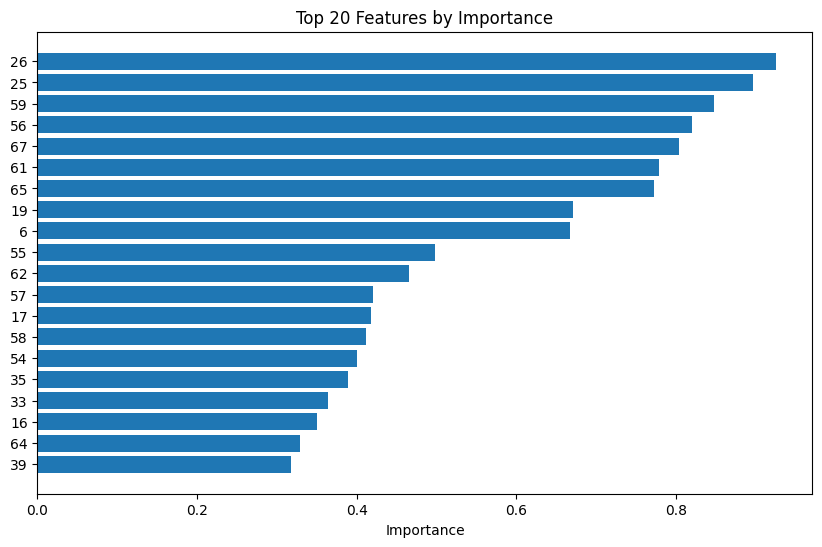

In [42]:
# 중요도에 따라 변수 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_20_features)), top_20_importance, align='center')
plt.yticks(range(len(top_20_features)), top_20_features)
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.show()

## 6. 평가 및 예측

학습 과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였습니다.

accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냅니다.

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

Accuracy 값이 높으면 좋은 성능을 낸다고도 할 수 있지만 이번 실습인 공정 이상 예측에서는 recall 값 또한 살펴봐야 합니다.

오차행렬(Confusion Matrix)은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다.

+ TN : Negative(0)로 예측했고, 실제로도 True인 경우 - 실제는 Negative
+ FP : Positive(1)로 예측했지만 실제는 False인 경우 - 실제는 Negative
+ FN : Negative(0)로 예측했고, 실제는 False인 경우 - 실제는 Positive
+ TP : Positive(1)로 예측했고, 실제로도 True인 경우 - 실제는 Positive

공정 이상 예측에서 중요한 것은 이상 없음을 정확히 예측하는 것 보단 이상 있음을 정확히 예측하는 것입니다.

recall 방식은 `예측한 이상 있음` 대비 `실제 이상 있음`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충합니다.

정밀도(Precision)는 예측을 Positve로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. 정밀도는 FP가 낮아야 합니다.
+ TP / (FP + TP)

재현율(recall)은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 말합니다. 재현율은 FN이 낮아야 합니다.
+ TP / (FN + TP)


이번 파트에서는 recall 방식을 포함한 또 다른 대표적인 평가 방법에 대해서 알아보고 주어진 데이터에 대해서 예측하는 것을 수행해보겠습니다.

### 6.1. 평가지표 구하기

In [45]:
# 여러분이 알고 있는 분류 모델의 평가지표를 모두 구해보세요
# ex) accuracy, precision, recall, F1...
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("recall:", recall)
print("precision:", precision)
print("f1:", f1)

Accuracy: 0.9171974522292994
recall: 0.0
precision: 0.0
f1: 0.0


### 6.2. Confusion Matrix

In [30]:
# LinearDiscriminantAnalysis 모델의 confusion matrix를 사용하기 위하여 학습용 데이터의 예측값을 저장합니다.
model_prediction_train = model.predict(x_train)
model_prediction_test = model.predict(x_test)

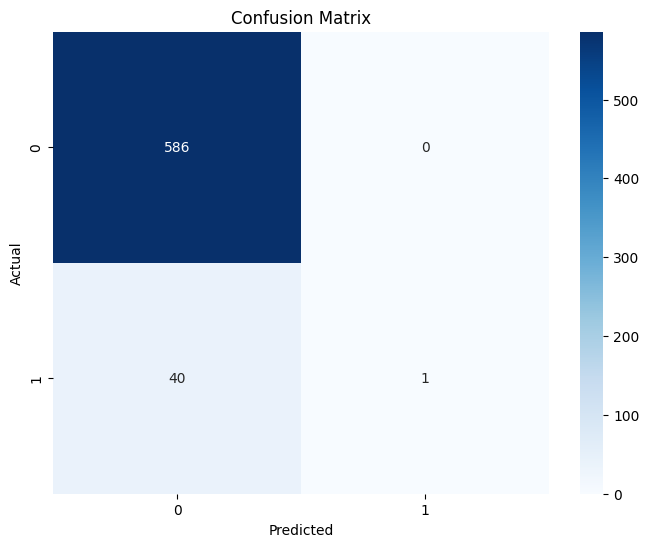

In [31]:
# confusion_matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Heatmap 그리는 함수
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_train, model_prediction_train)

위 confusion matrix에서 x 축은 예측한 데이터의 label을 의미하고 y 축은 실제 데이터의 label을 의미합니다.

- **0,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수 = TN
- **0,1 의 값:** `이상 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수 = FP
- **1,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수 = FN
- **1,1 의 값:** `이상 있음(Fail)` 이라고 에측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수 = TP

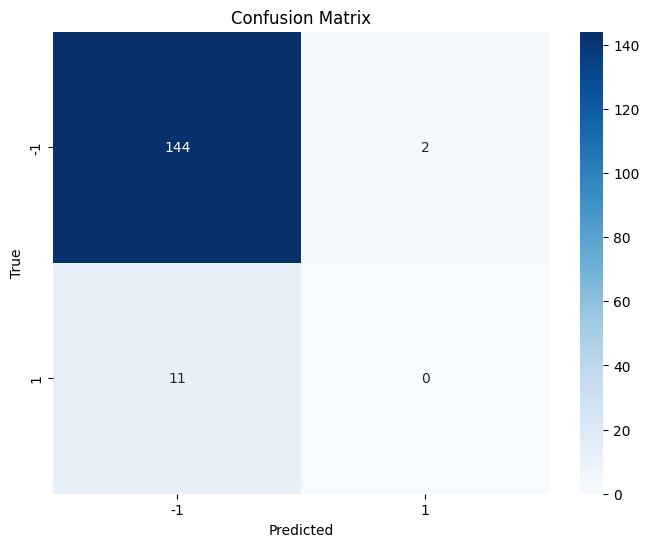

In [32]:
# LogisticRegression 모델에서 평가용 데이터(`x_test, y_test`)의 confusion matrix를 구하세요.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix 생성
cm = confusion_matrix(y_test, model_prediction_test)

# 클래스 레이블
class_labels = np.unique(y_test)

# Heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()